# Zillow project Part I: Play with Data

In [1]:
# Import libraries necessary for this project
#Let's begin the Project...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
%matplotlib inline
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


### Let's look at what is going on with the Properties Dataset

In [33]:
#Load datasets (properties16 and properties17)
properties16 = pd.read_csv('../Data/properties_2016.csv')
properties17 = pd.read_csv('../Data/properties_2017.csv')
df_train = pd.read_csv('../Data/train_2016_v2.csv')
df_test = pd.read_csv('../Data/train_2017.csv')

In [9]:
properties16.shape

(2985217, 58)

In [10]:
properties17.shape

(2985217, 58)

In [11]:
properties16.head

<bound method NDFrame.head of           parcelid  airconditioningtypeid  architecturalstyletypeid  \
0         10754147                    NaN                       NaN   
1         10759547                    NaN                       NaN   
2         10843547                    NaN                       NaN   
3         10859147                    NaN                       NaN   
4         10879947                    NaN                       NaN   
5         10898347                    NaN                       NaN   
6         10933547                    NaN                       NaN   
7         10940747                    NaN                       NaN   
8         10954547                    NaN                       NaN   
9         10976347                    NaN                       NaN   
10        11073947                    NaN                       NaN   
11        11114347                    NaN                       NaN   
12        11116947                    NaN      

In [12]:
properties16.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


In [13]:
properties17.describe()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,815362.000000,6061.000000,1627.000000,2.982260e+06,2.982272e+06,12731.000000,1.941395e+06,2.868061e+06,17379.0,...,2646.000000,2.937384e+06,685676.000000,2.938753e+06,2.950951e+06,2.982284e+06,2.925291e+06,2.962465e+06,56517.000000,2.910232e+06
mean,1.332586e+07,1.945723,7.202607,647.220652,2.216196e+00,3.093362e+00,3.734742,6.280822e+00,2.303826e+00,66.0,...,278.365457,1.964438e+03,1.400956,1.781429e+05,4.435279e+05,2.015998e+03,2.684558e+05,5.408949e+03,13.891696,6.048434e+13
std,7.909966e+06,3.160507,2.436290,538.787104,1.078250e+00,1.271569e+00,0.500371,1.729923e+00,1.003243e+00,0.0,...,369.784399,2.364428e+01,0.539056,4.600503e+05,8.163366e+05,6.039949e-02,4.865097e+05,9.675567e+03,2.562172,3.249133e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,2.400000e-01,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,5.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.766600e+04,1.882200e+05,2.016000e+03,7.970000e+04,2.468620e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,535.000000,2.000000e+00,3.000000e+00,4.000000,6.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.270660e+05,3.211610e+05,2.016000e+03,1.766190e+05,4.007620e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.500000,3.000000e+00,4.000000e+00,4.000000,8.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,2.040000e+05,5.140720e+05,2.016000e+03,3.261000e+05,6.230500e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,3.200000e+01,2.500000e+01,5.000000,1.200000e+01,3.200000e+01,66.0,...,6141.000000,2.016000e+03,41.000000,2.553212e+08,3.196225e+08,2.016000e+03,9.401108e+07,3.823176e+06,99.000000,4.830301e+14


### properties17 == properties16, so we will save the properties17 for future.

In [46]:
#There are lots 'NaN' data, let's see what is missing
def missing_data():
    return properties16.columns[properties16.isnull().any()].tolist()
column_missing_data = properties16[missing_data()].isnull().sum()
column_missing_data.sort(axis=0, ascending=False, kind='quicksort', 
                         na_position='last', inplace=True)
print (column_missing_data)
print('Total of missing data of 2016 properties:',properties16.isnull().values.sum())

storytypeid                     2983593
basementsqft                    2983589
yardbuildingsqft26              2982570
fireplaceflag                   2980054
architecturalstyletypeid        2979156
typeconstructiontypeid          2978470
finishedsquarefeet13            2977545
buildingclasstypeid             2972588
decktypeid                      2968121
finishedsquarefeet6             2963216
poolsizesum                     2957257
pooltypeid2                     2953142
pooltypeid10                    2948278
taxdelinquencyflag              2928755
taxdelinquencyyear              2928753
hashottuborspa                  2916203
yardbuildingsqft17              2904862
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedfloor1squarefeet        2782500
threequarterbathnbr             2673586
fireplacecnt                    2672580
pooltypeid7                     2499758
poolcnt                         2467683
numberofstories                 2303148


### Let's Load the Train Dataset

In [35]:
train16 = pd.read_csv('../Data/train_2016_v2.csv', parse_dates =["transactiondate"])

In [36]:
train16.describe()

,parcelid,logerror
count,9.027500e+04,90275.000000
mean,1.298466e+07,0.011457
std,2.504510e+06,0.161079
min,1.071174e+07,-4.605000
25%,1.155950e+07,-0.025300
50%,1.254734e+07,0.006000
75%,1.422755e+07,0.039200
max,1.629608e+08,4.737000


In [38]:
train16.shape

(90275, 3)

This means there were 9,0275 houses sold in 2016.

In [39]:
#Let's see how many house are the first sale
onlyProps = len(train16['parcelid'].unique())
multipleSales = len(train16) - onlyProps
print (onlyProps)
print (multipleSales)

90150
125


Of the 9,0275 total sales, 9,0150 were sold only once in the year of 2016, and 125 sold twice.

In [40]:
# Let's check the months and sales
train16['sale_month'] = train16['transactiondate'].apply(lambda x: (x.to_pydatetime()).month)
train16['sale_day'] = train16['transactiondate'].apply(lambda x: (x.to_pydatetime()).day)
train16['sale_year'] = train16['transactiondate'].apply(lambda x: (x.to_pydatetime()).year)

In [41]:
train16.head(10)

,parcelid,logerror,transactiondate,sale_month,sale_day,sale_year
0,11016594,0.0276,2016-01-01,1,1,2016
1,14366692,-0.1684,2016-01-01,1,1,2016
2,12098116,-0.0040,2016-01-01,1,1,2016
3,12643413,0.0218,2016-01-02,1,2,2016
4,14432541,-0.0050,2016-01-02,1,2,2016
5,11509835,-0.2705,2016-01-02,1,2,2016
6,12286022,0.0440,2016-01-02,1,2,2016
7,17177301,0.1638,2016-01-02,1,2,2016
8,14739064,-0.0030,2016-01-02,1,2,2016
9,14677559,0.0843,2016-01-03,1,3,2016


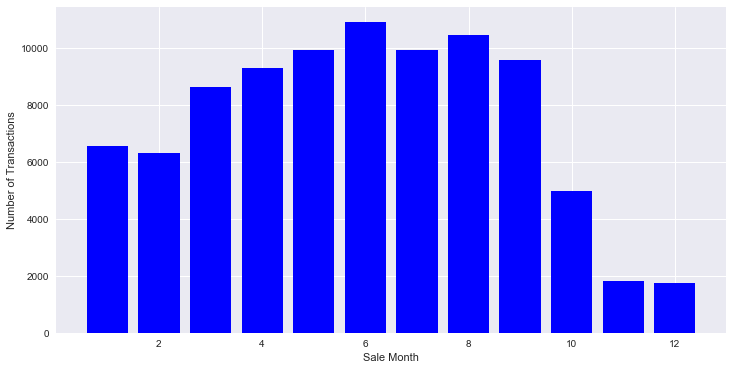

In [44]:
#let's see the graph
plt.figure(figsize=(12,6))
plt.bar(range(1,13),(train16.groupby('sale_month').count())['parcelid'],color='blue')
plt.xlabel('Sale Month')
plt.ylabel('Number of Transactions')

### Let's see the log error of train16

In [47]:
logTrain16 = train16[train16['sale_month']== 1]['logerror']

In [48]:
logTrain16.head(10)

0    0.0276
1   -0.1684
2   -0.0040
3    0.0218
4   -0.0050
5   -0.2705
6    0.0440
7    0.1638
8   -0.0030
9    0.0843
Name: logerror, dtype: float64

In [50]:
logTrain16.describe()

count    6556.000000
mean        0.015870
std         0.171525
min        -4.605000
25%        -0.023300
50%         0.009000
75%         0.045000
max         3.018000
Name: logerror, dtype: float64

In [66]:
 #make a [] to store the monthly logerror
avgMonthLog = []

In [67]:
# loop through each month to see the logerror by the Mean 
for i in range(1,13):
    avgLogError = np.mean(train16[train16['sale_month']==i]['logerror'])
    avgMonthLog.append(avgLogError)
print(avgMonthLog)

[0.015869524100061077, 0.01608212537501983, 0.009866759130836856, 0.006605488132316614, 0.006925880935649025, 0.007172239516572072, 0.011687302704333059, 0.011572814051164615, 0.016255362924282046, 0.016341631504922665, 0.014510131434830202, 0.019122311673375463]


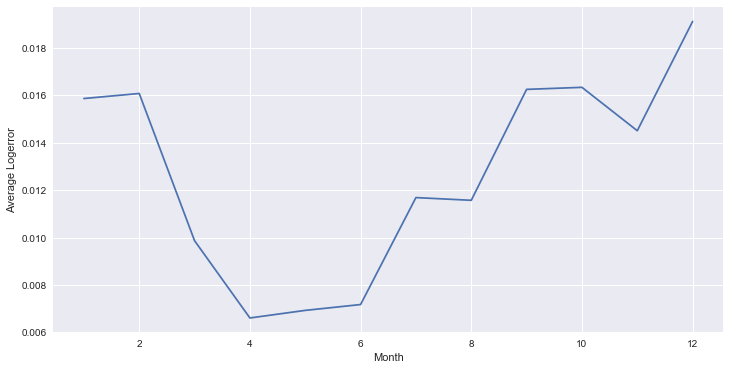

In [68]:
plt.figure(figsize=(12,6))
time = range(1,13)
plt.plot(time,avgMonthLog)
plt.xlabel('Month')
plt.ylabel('Average Logerror')

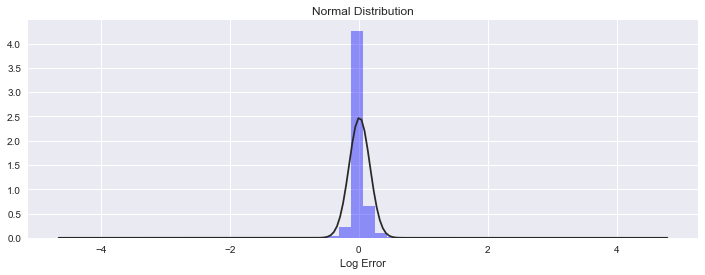

In [79]:
plt.figure(figsize=(12, 4))
plt.title('Normal Distribution')
plt.xlabel('Log Error')
xmin,xmax=plt.xlim()
x = np.linspace(-5,5,1000)
sns.distplot(train16.logerror.values,kde= False, color='blue',fit= st.norm)


### Data Checking and Cleaning

In [25]:
TaxValueOfParcel=properties16['taxvaluedollarcnt']
TaxValueOfParcel.describe()

count    2.942667e+06
mean     4.204790e+05
std      7.263467e+05
min      1.000000e+00
25%      1.796750e+05
50%      3.060860e+05
75%      4.880000e+05
max      2.827860e+08
Name: taxvaluedollarcnt, dtype: float64

ValueError: cannot convert float NaN to integer

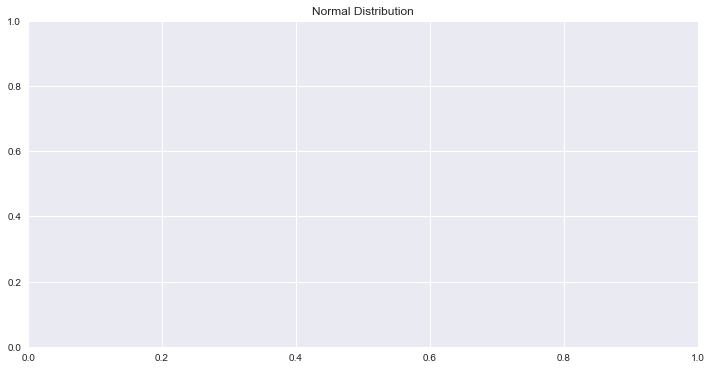

In [26]:
plt.figure(figsize=(12, 6))
plt.figure(1); plt.title('Normal Distribution')
sns.distplot(TaxValueOfParcel, kde= False, color='blue',fit= st.norm)
plt.figure(figsize=(12, 6))
plt.figure(2); plt.title('Log Normal Distribution')
sns.distplot(TaxValueOfParcel, kde= False, color='blue',fit= st.lognorm)